In [133]:
# !pip install -U scikit-learn
import pandas as pd
import numpy as np
import klib
from platform import python_version
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns

pd.set_option('display.max_columns', 100)

%precision 2
import pandas as pd
from datetime import datetime


import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


# Start a SparkSession
import findspark
findspark.init()

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)

python 3.10.9
numpy 1.23.5
pandas 1.5.3
klib 1.0.7


In [134]:
df1 = pd.read_csv('Resources/Traffic Crashes.csv')

In [135]:
# Access the data as a pandas DataFrame object
df1.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821,N,ELSTON AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",06/03/2018 08:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1630,N,KEELER AVE,2534.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [136]:
df1.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,709406.000000,1.990010e+05,709406.000000,709401.000000,709402.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.000000,707866.0,709406.000000,709406.000000,709406.000000,704845.000000,704845.000000
mean,28.374799,1.333059e+01,3686.009869,1240.031085,2.034256,0.185739,0.001192,0.019973,0.104792,0.059781,2.006255,0.0,13.208854,4.125412,6.649042,41.854518,-87.673347
std,6.246458,2.961661e+03,2896.107301,705.288755,0.452918,0.558953,0.037567,0.165043,0.416738,0.314006,1.155954,0.0,5.559867,1.980333,3.464756,0.334368,0.679366
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1239.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781436,-87.721543
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874531,-87.673770
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924102,-87.633055
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [137]:
# Remove the unwanted columns and any leading/trailing spaces
cols_to_remove = ["CRASH_RECORD_ID","CRASH_DATE_EST_I","LANE_CNT","REPORT_TYPE","INTERSECTION_RELATED_I",
                  "NOT_RIGHT_OF_WAY_I","HIT_AND_RUN_I","DATE_POLICE_NOTIFIED","SEC_CONTRIBUTORY_CAUSE",
                 "BEAT_OF_OCCURRENCE","PHOTOS_TAKEN_I","STATEMENTS_TAKEN_I",
                  "DOORING_I","WORK_ZONE_I","WORKERS_PRESENT_I","INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT","INJURIES_NO_INDICATION","INJURIES_UNKNOWN",
                 "LOCATION"]
df1 = df1.drop([col.strip() for col in cols_to_remove if col.strip() in df1.columns], axis=1)

# Print the resulting DataFrame
df1.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201
1,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659
2,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203
3,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997
4,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RD_NO                    705395 non-null  object 
 1   CRASH_DATE               709406 non-null  object 
 2   POSTED_SPEED_LIMIT       709406 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object 
 4   DEVICE_CONDITION         709406 non-null  object 
 5   WEATHER_CONDITION        709406 non-null  object 
 6   LIGHTING_CONDITION       709406 non-null  object 
 7   FIRST_CRASH_TYPE         709406 non-null  object 
 8   TRAFFICWAY_TYPE          709406 non-null  object 
 9   ALIGNMENT                709406 non-null  object 
 10  ROADWAY_SURFACE_COND     709406 non-null  object 
 11  ROAD_DEFECT              709406 non-null  object 
 12  CRASH_TYPE               709406 non-null  object 
 13  DAMAGE                   709406 non-null  object 
 14  PRIM

In [139]:
# Replace NaN values with 0 & NA
df1['WORK_ZONE_TYPE'] = df1['WORK_ZONE_TYPE'].fillna(value='NA')
df1['NUM_UNITS'] = df1['NUM_UNITS'].fillna(0)
df1['MOST_SEVERE_INJURY'] = df1['MOST_SEVERE_INJURY'].fillna(value='NA')
df1['INJURIES_TOTAL'] = df1['INJURIES_TOTAL'].fillna(0)
df1['LATITUDE'] = df1['LATITUDE'].fillna(0)
df1['LONGITUDE'] = df1['LONGITUDE'].fillna(0)
df1['RD_NO'] = df1['RD_NO'].fillna(value='NA')
df1['STREET_NAME'] = df1['STREET_NAME'].fillna(value='NA')
df1['STREET_DIRECTION'] = df1['STREET_DIRECTION'].fillna(value='NA')
df1['INJURIES_FATAL'] = df1['INJURIES_FATAL'].fillna(0)
df1['INJURIES_INCAPACITATING'] = df1['INJURIES_INCAPACITATING'].fillna(0)
# Print the resulting DataFrame
df1.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201
1,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659
2,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203
3,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997
4,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RD_NO                    709406 non-null  object 
 1   CRASH_DATE               709406 non-null  object 
 2   POSTED_SPEED_LIMIT       709406 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object 
 4   DEVICE_CONDITION         709406 non-null  object 
 5   WEATHER_CONDITION        709406 non-null  object 
 6   LIGHTING_CONDITION       709406 non-null  object 
 7   FIRST_CRASH_TYPE         709406 non-null  object 
 8   TRAFFICWAY_TYPE          709406 non-null  object 
 9   ALIGNMENT                709406 non-null  object 
 10  ROADWAY_SURFACE_COND     709406 non-null  object 
 11  ROAD_DEFECT              709406 non-null  object 
 12  CRASH_TYPE               709406 non-null  object 
 13  DAMAGE                   709406 non-null  object 
 14  PRIM

In [141]:
# get the sorted CRASH_DATE
Sort_Dates = df1['CRASH_DATE'].sort_values()

# display the result
print(Sort_Dates)

155829    01/01/2016 01:00:00 AM
620708    01/01/2016 01:00:00 AM
202260    01/01/2016 01:00:00 AM
196300    01/01/2016 01:03:00 AM
272220    01/01/2016 01:18:00 AM
                   ...          
689523    12/31/2022 12:47:00 PM
667422    12/31/2022 12:52:00 AM
695223    12/31/2022 12:53:00 PM
688908    12/31/2022 12:55:00 PM
657062    12/31/2022 12:58:00 PM
Name: CRASH_DATE, Length: 709406, dtype: object


In [142]:
# convert CRASH_DATE column to datetime datatype - UTC
df1['CRASH_DATE'] = pd.to_datetime(df1['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# extract year from CRASH_DATE column and create new CRASH_YEAR column
df1['CRASH_YEAR'] = df1['CRASH_DATE'].dt.year

In [143]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   RD_NO                    709406 non-null  object        
 1   CRASH_DATE               709406 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       709406 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE   709406 non-null  object        
 4   DEVICE_CONDITION         709406 non-null  object        
 5   WEATHER_CONDITION        709406 non-null  object        
 6   LIGHTING_CONDITION       709406 non-null  object        
 7   FIRST_CRASH_TYPE         709406 non-null  object        
 8   TRAFFICWAY_TYPE          709406 non-null  object        
 9   ALIGNMENT                709406 non-null  object        
 10  ROADWAY_SURFACE_COND     709406 non-null  object        
 11  ROAD_DEFECT              709406 non-null  object        
 12  CRASH_TYPE      

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR
0,JC199149,2019-03-25 14:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201,2019
1,JB422857,2018-09-05 08:40:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659,2018
2,JF318029,2022-07-15 00:45:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,300,N,CENTRAL PARK AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,6,7,41.886336,-87.716203,2022
3,JF324552,2022-07-15 18:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,2359,N,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,7,41.925111,-87.667997,2022
4,JB291672,2018-06-03 17:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709401,NA,2023-03-22 08:26:00,30,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,800,E,95TH ST,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,3,41.722154,-87.604448,2023
709402,NA,2023-03-23 12:40:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,755,W,LAWRENCE AVE,NA,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,12,5,3,41.969052,-87.649789,2023
709403,NA,2023-03-22 22:25:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,214,S,WOOD ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,22,4,3,41.878275,-87.671816,2023
709404,JG173150,2023-03-03 19:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,699,N,LAKE SHORE DR NB,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,6,3,41.895082,-87.615314,2023


In [144]:
df1.to_csv('Resources/Clean_Traffic_Crashes.csv', index=False)

In [145]:
import zipfile

# create a zip file object
zip_file = zipfile.ZipFile('Resources/Clean_Traffic_Crashes.zip', 'w')

# add files to the zip file
zip_file.write('Resources/Clean_Traffic_Crashes.csv')


# close the zip file object
zip_file.close()

In [146]:
#Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [147]:
from pyspark import SparkFiles
url = "Resources/Clean_Traffic_Crashes.csv"


spark.sparkContext.addFile(url)
df = spark.read.option('header', 'true').csv(SparkFiles.get("Clean_Traffic_Crashes.csv"), inferSchema=True, sep=',', timestampFormat="mm/dd/yy")

# Show DataFrame
df.show()

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_MONTH|   LATITUDE|   LONGITUD

In [148]:
# Show schema to confirm date type
df.printSchema()

root
 |-- RD_NO: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- POSTED_SPEED_LIMIT: integer (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- STREET_NO: integer (nullable = true)
 |-- STREET_DIRECTION: string (nullable = true)
 |-- STREET_NAME: string (nullable = true)
 |-- WORK_ZONE_TYPE: string (nullable = true)
 |-- NUM_UNITS: double (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = true)
 |-- INJURIES_TOTAL: double 

In [149]:
# Import date time functions
from pyspark.sql.functions import year

# Show the year for the date column
# df.select(year(df["date"])).show()
df.select(year(df.CRASH_DATE)).show()

+----------------+
|year(CRASH_DATE)|
+----------------+
|            2019|
|            2018|
|            2022|
|            2022|
|            2018|
|            2022|
|            2022|
|            2017|
|            2018|
|            2020|
|            2017|
|            2022|
|            2022|
|            2022|
|            2022|
|            2022|
|            2022|
|            2018|
|            2019|
|            2017|
+----------------+
only showing top 20 rows



In [150]:
# Save the year as a new column
df = df.withColumn("year", year(df['CRASH_DATE']))
df.show()

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+----+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_MONTH|   LATITUDE|   LON

In [151]:
# Create a temporary view of the DataFrame.
df.createOrReplaceTempView('chicago')

In [152]:
query = """
(SELECT RD_NO, SUM(INJURIES_TOTAL)
FROM chicago
WHERE year ==2019
GROUP BY RD_NO)
"""
spark.sql(query).show()

+--------+-------------------+
|   RD_NO|sum(INJURIES_TOTAL)|
+--------+-------------------+
|JC292003|                1.0|
|JC309314|                0.0|
|JC464723|                0.0|
|JC415182|                0.0|
|JC415875|                0.0|
|JC422423|                0.0|
|JC142710|                0.0|
|JC403186|                1.0|
|JC246995|                0.0|
|JC482511|                0.0|
|JC107681|                1.0|
|JC165943|                6.0|
|JC124615|                0.0|
|JC255355|                0.0|
|JC210947|                0.0|
|JC155062|                0.0|
|JC121778|                0.0|
|JC549175|                0.0|
|JC155558|                0.0|
|JC544555|                0.0|
+--------+-------------------+
only showing top 20 rows



<Axes: title={'center': 'CRASH_TYPE'}>

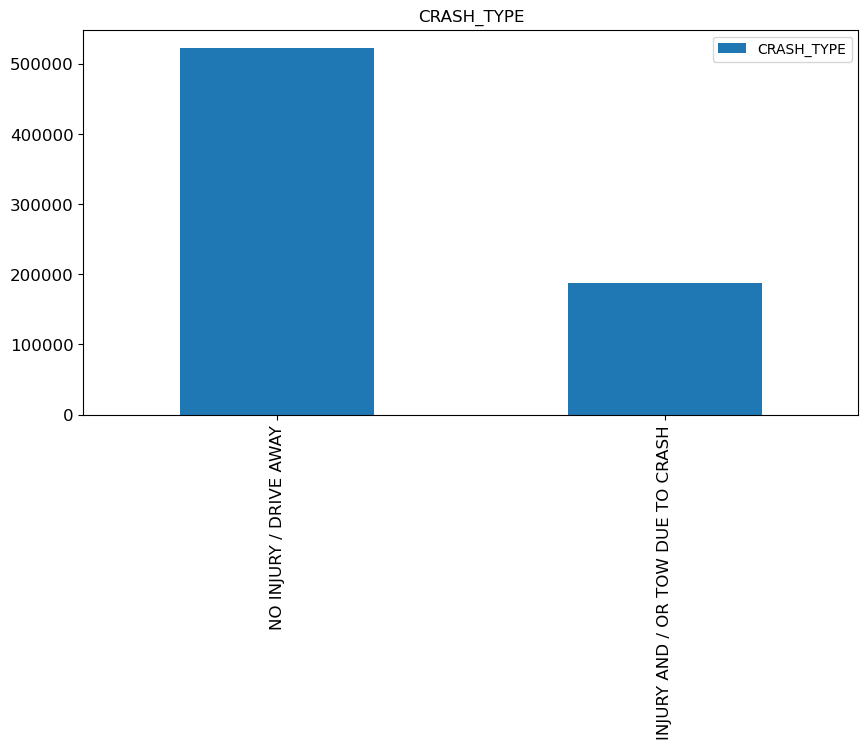

In [153]:
df1['CRASH_TYPE'].value_counts().plot(kind='bar', title ="CRASH_TYPE", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'DAMAGE'}, ylabel='DAMAGE'>

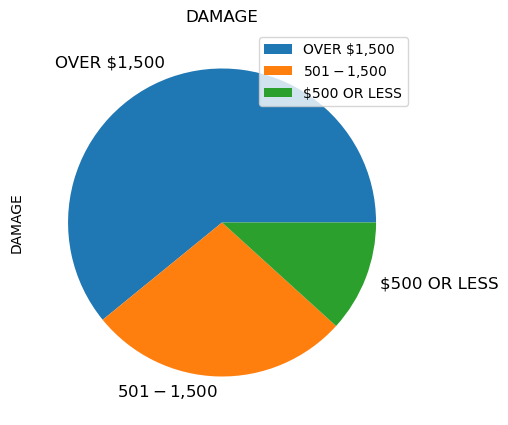

In [154]:
df1['DAMAGE'].value_counts().plot(kind='pie', title ="DAMAGE", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'WEATHER_CONDITION'}>

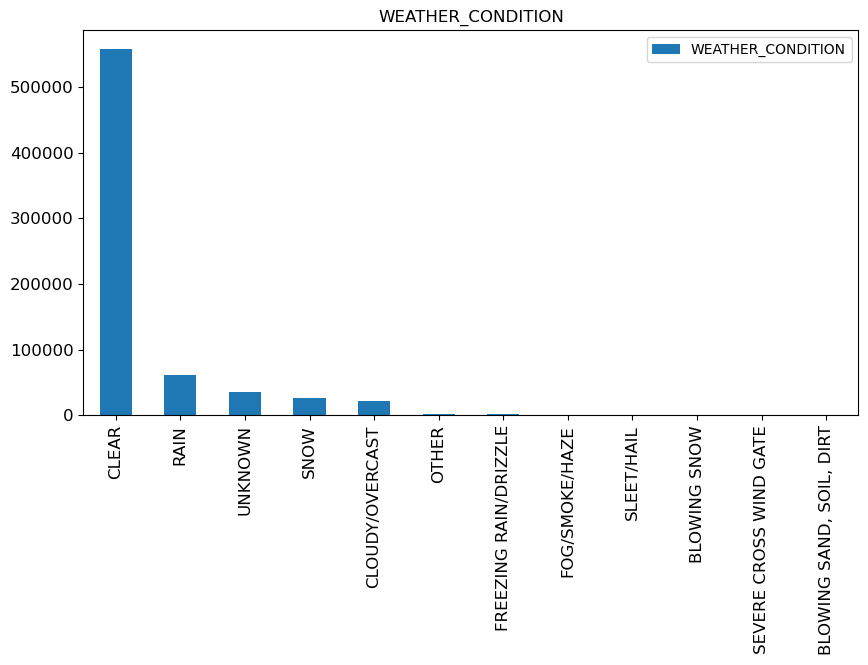

In [155]:
df1['WEATHER_CONDITION'].value_counts().plot(kind='bar', title ="WEATHER_CONDITION", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'road surface condition'}>

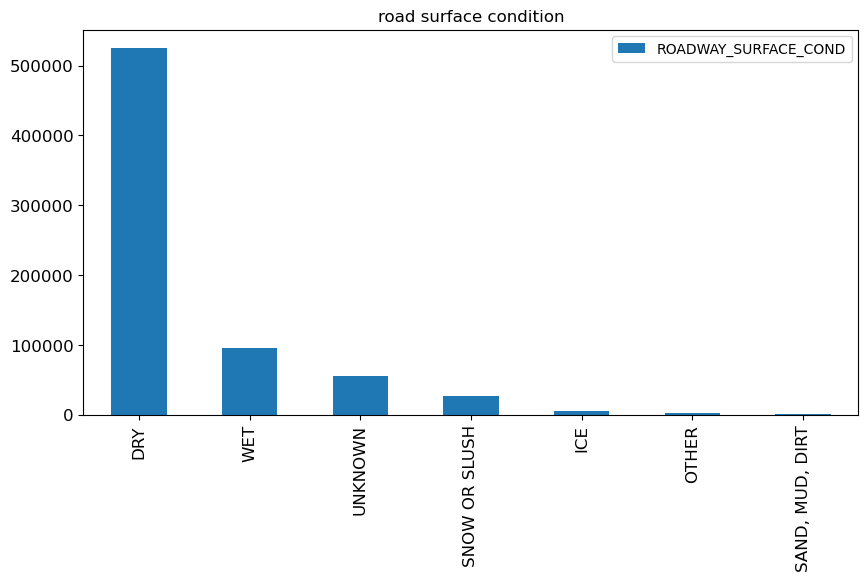

In [156]:
df1['ROADWAY_SURFACE_COND'].value_counts().plot(kind='bar', title ="road surface condition", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Month'}, xlabel='CRASH_MONTH'>

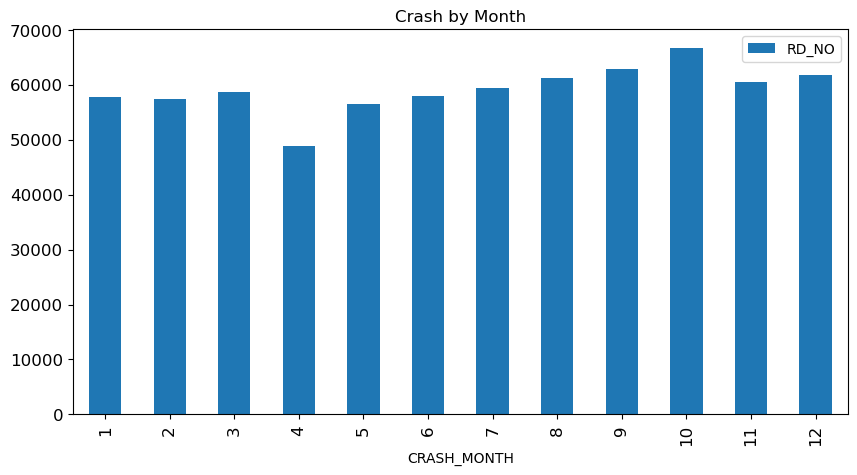

In [157]:
df1.groupby(['CRASH_MONTH']).count()['RD_NO'].plot(kind='bar', title ="Crash by Month", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Day'}, xlabel='CRASH_DAY_OF_WEEK'>

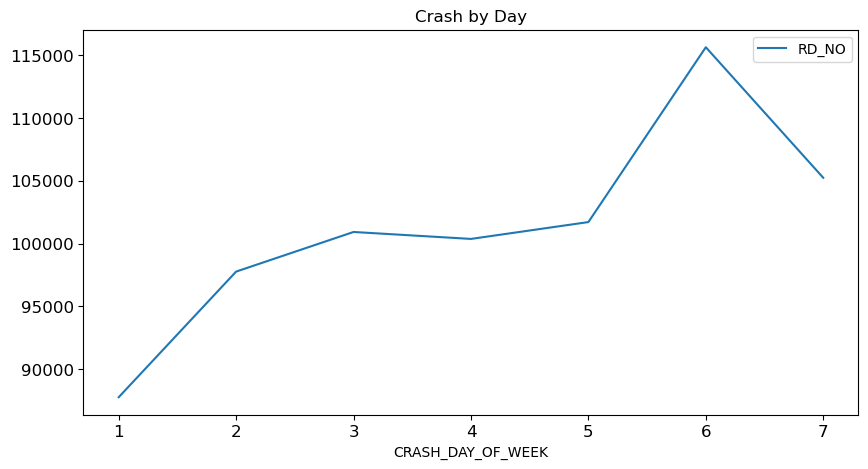

In [158]:
df1.groupby(['CRASH_DAY_OF_WEEK']).count()['RD_NO'].plot(kind='line', title ="Crash by Day", figsize=(10, 5), legend=True, fontsize=12)

<Axes: title={'center': 'Crash by Hour'}, xlabel='CRASH_HOUR'>

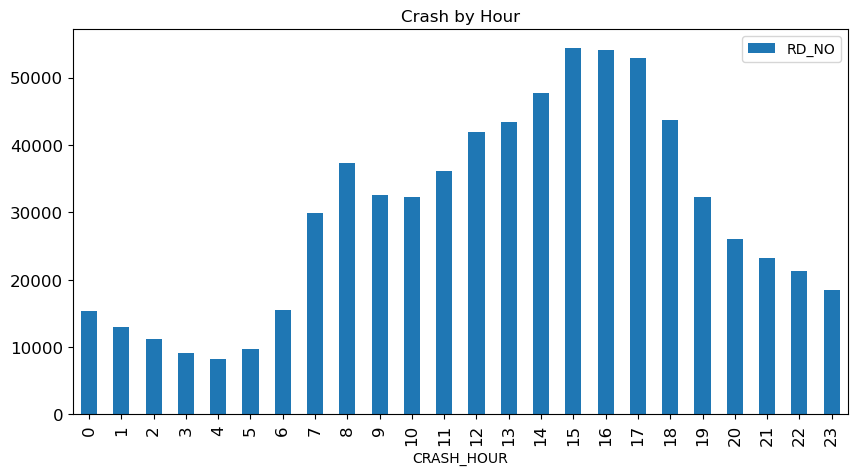

In [159]:
df1.groupby(['CRASH_HOUR']).count()['RD_NO'].plot(kind='bar', title ="Crash by Hour", figsize=(10, 5), legend=True, fontsize=12)

# Machine Learning Modelling  

In [160]:
df1_features = ['POSTED_SPEED_LIMIT',
            'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION',
            'ROAD_DEFECT',
            'STREET_NO','STREET_DIRECTION','STREET_NAME',
            'LATITUDE','LONGITUDE',
            'CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH',
            'MOST_SEVERE_INJURY','DAMAGE','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','INJURIES_TOTAL',
            'INJURIES_FATAL', 'INJURIES_INCAPACITATING'
            ]

In [161]:
# Convert geo-dataframe into a regular dataframe.
df2 = pd.DataFrame(df1[df1_features])

#df.shape
df2.describe()

,POSTED_SPEED_LIMIT,STREET_NO,LATITUDE,LONGITUDE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING
count,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000,709406.000000
mean,28.374799,3686.009869,41.585422,-87.109667,13.208854,4.125412,6.649042,0.185335,0.001190,0.019929
std,6.246458,2896.107301,3.361782,7.039932,5.559867,1.980333,3.464756,0.558413,0.037526,0.164866
min,0.000000,0.000000,0.000000,-87.936193,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1239.000000,41.780151,-87.721251,9.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,30.000000,3200.000000,41.874133,-87.673226,14.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,30.000000,5600.000000,41.923920,-87.632517,17.000000,6.000000,10.000000,0.000000,0.000000,0.000000
max,99.000000,451100.000000,42.022780,0.000000,23.000000,7.000000,12.000000,21.000000,4.000000,7.000000


In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709406 entries, 0 to 709405
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       709406 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   709406 non-null  object 
 2   DEVICE_CONDITION         709406 non-null  object 
 3   WEATHER_CONDITION        709406 non-null  object 
 4   LIGHTING_CONDITION       709406 non-null  object 
 5   ROAD_DEFECT              709406 non-null  object 
 6   STREET_NO                709406 non-null  int64  
 7   STREET_DIRECTION         709406 non-null  object 
 8   STREET_NAME              709406 non-null  object 
 9   LATITUDE                 709406 non-null  float64
 10  LONGITUDE                709406 non-null  float64
 11  CRASH_HOUR               709406 non-null  int64  
 12  CRASH_DAY_OF_WEEK        709406 non-null  int64  
 13  CRASH_MONTH              709406 non-null  int64  
 14  MOST

C:\Users\akiye\AppData\Local\Temp\ipykernel_26972\2524220229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df2.corr()


<Axes: >

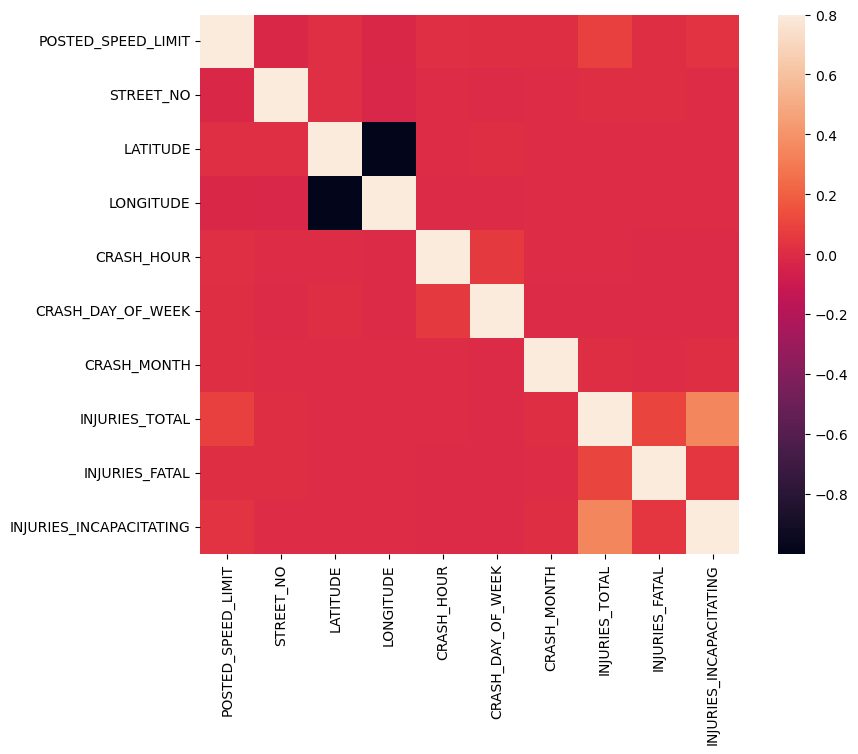

In [163]:
corr_mat = df2.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_mat, vmax=.8, square=True)

In [176]:
query = """
(SELECT *
FROM chicago
WHERE year <=2019 AND year >=2018
)
"""
df_crash=spark.sql(query).show()
df_crash

+--------+-------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-----------------------+---------+----------------+----------------+--------------+---------+--------------------+--------------+--------------+-----------------------+----------+-----------------+-----------+-----------+------------+----------+----+
|   RD_NO|         CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|PRIM_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|     STREET_NAME|WORK_ZONE_TYPE|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|CRASH_HOUR|CRASH_DAY_OF_WEEK|CRASH_MONTH|   LATITUDE|   LON

In [177]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

df4 = spark.sql(query).toPandas()
df4

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,year
0,JC199149,2019-03-25 14:43:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NA,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,14,2,3,41.884547,-87.641201,2019,2019
1,JB422857,2018-09-05 08:40:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",4821,N,ELSTON AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,8,4,9,41.968562,-87.740659,2018,2018
2,JB291672,2018-06-03 17:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,1630,N,KEELER AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,1,6,41.910758,-87.731389,2018,2018
3,JB529385,2018-11-26 10:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",WEATHER,8300,S,STONY ISLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,10,2,11,41.744152,-87.585945,2018,2018
4,JB163972,2018-02-24 14:37:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,520,S,MICHIGAN AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,14,7,2,41.875260,-87.624397,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236707,JC483473,2019-10-23 13:32:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,RELATED TO BUS STOP,20,W,79TH ST,NA,2.0,INCAPACITATING INJURY,2.0,0.0,2.0,13,4,10,41.751046,-87.625378,2019,2019
236708,JC402666,2019-08-22 13:02:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,IMPROPER BACKING,302,N,PULASKI RD,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,13,5,8,41.885534,-87.725953,2019,2019
236709,JC537480,2019-12-06 21:32:00,30,STOP SIGN/FLASHER,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,8199,S,ASHLAND AVE,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,21,6,12,41.744986,-87.663158,2019,2019
236710,JC395537,2019-08-16 18:56:00,25,TRAFFIC SIGNAL,UNKNOWN,CLEAR,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,550,W,ROOSEVELT RD,NA,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,18,6,8,41.867344,-87.641238,2019,2019


In [178]:
df4.INJURIES_TOTAL.value_counts()

0.0     203811
1.0      25026
2.0       5320
3.0       1623
4.0        560
5.0        213
6.0         87
7.0         35
9.0         11
8.0          9
10.0         6
15.0         4
11.0         3
21.0         2
13.0         1
16.0         1
Name: INJURIES_TOTAL, dtype: int64

In [179]:
# setting X, y for train-test-split
target = 'INJURIES_TOTAL'
X = df4.drop(columns= target)
y = df4[target]

# train-test-split, test_size = 25%, random_state = 78
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=78)

In [180]:
# retrieving list of numeric columns 
num_cols = df4.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'year']

In [181]:
# creating a pipeline 
# SimpleImputer will use the median to fill nulls  
# RobustScaler will use the median to scale 
num_transform = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scale', RobustScaler())])

In [182]:
# Encoding catagory variables
# retrieving list of categorical columns 
cat_cols = df4.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']

In [183]:
# creating a pipeline
# SimpleImputer will use strategy 'constant' == 'missing value' input for objects
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

cat_transform 

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [184]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

C:\Users\akiye\anaconda4\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 396. GiB for an array with shape (177534, 299424) and data type float64

In [ ]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

In [34]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [48]:
#Creating StandardScaler instance
scaler = StandardScaler()

In [49]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [50]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

In [52]:
# fit the model 
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)

C:\Users\akiye\anaconda4\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akiye\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# classification report using function 
evaluate_classification(log_reg,X_train, X_test, y_train, y_test, label = "Logistic Regression")

NameError: name 'evaluate_classification' is not defined

# Fitting the Decision Tree Model

In [38]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [39]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making Predictions Using the Tree Model

In [40]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Model Evaluation

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


ValueError: Shape of passed values is (7, 7), indices imply (2, 2)

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


NameError: name 'cm_df' is not defined

# Visualizing the Decision Tree

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [ ]:
# Saving the tree as PDF
file_path = ("Resources/crash_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Resources/crash_tree.png")
graph.write_png(file_path)
